(20640, 8)
(20640,)
نمایش ۵ ردیف اول دیتاست:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

توزیع کلاس‌های KBinsDiscretizer:
target_kbins
1.0    7870
2.0    4568
0.0    4489
3.0    1991
4.0    1722
Name: count, dtype: int64


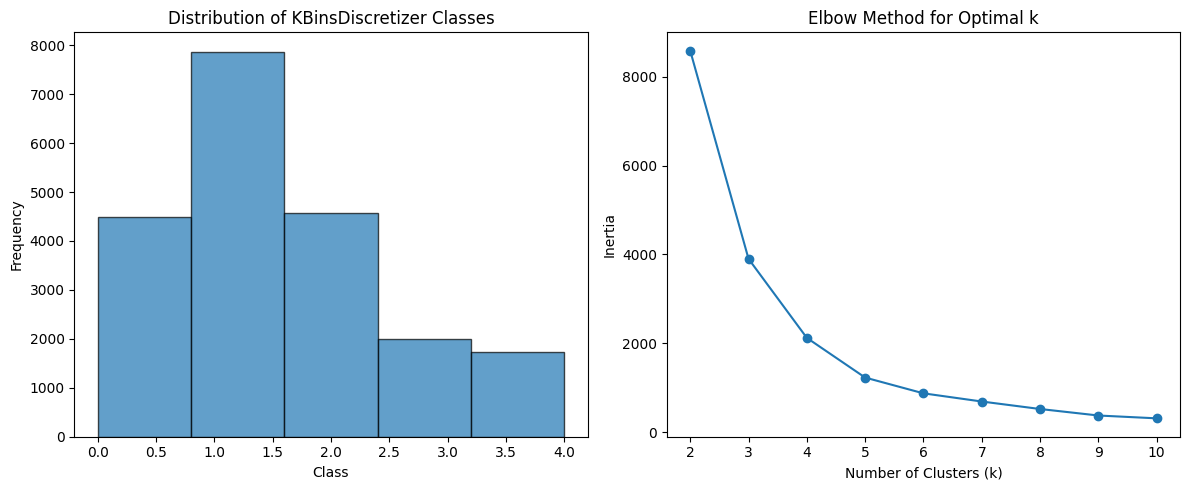


تعداد بهینه خوشه‌ها (k) بر اساس روش البو: 5

توزیع کلاس‌های K-means:
target_kmeans
0    6440
2    5770
3    4517
4    2309
1    1604
Name: count, dtype: int64


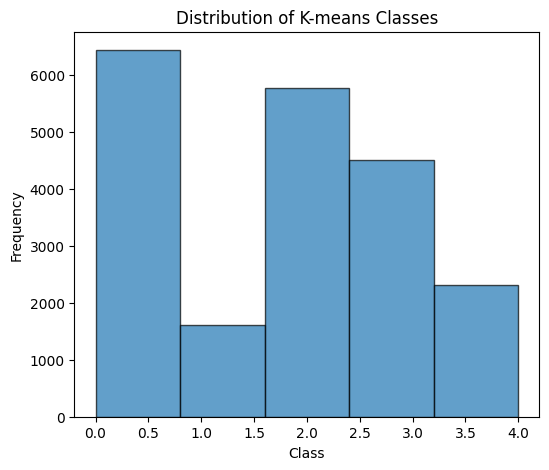


مقایسه دو روش کلاس‌بندی:
KBinsDiscretizer Classes:
target_kbins
1.0    7870
2.0    4568
0.0    4489
3.0    1991
4.0    1722
Name: count, dtype: int64

K-means Classes:
target_kmeans
0    6440
2    5770
3    4517
4    2309
1    1604
Name: count, dtype: int64
شاخص سیلهوت برای K-means: 0.5826487759445548
شاخص سیلهوت برای KBinsDiscretizer: 0.5560330703050222
اینرسی برای K-means: 1227.6161481750114
معیار مشابه اینرسی برای KBinsDiscretizer: 1645.8512683971398


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# دریافت دیتاست قیمت خانه‌ها در کالیفرنیا
california_housing = fetch_california_housing()
X = california_housing.data  # ویژگی‌ها
y = california_housing.target  # تارگت (قیمت خانه‌ها)
print(X.shape)
print(y.shape)

# تبدیل به DataFrame برای راحتی کار
df = pd.DataFrame(X, columns=california_housing.feature_names)
df['target'] = y

# نمایش ۵ ردیف اول دیتاست
print("نمایش ۵ ردیف اول دیتاست:")
print(df.head())

# کلاس‌بندی با KBinsDiscretizer (استراتژی uniform)
n_bins = 5  # تعداد بازه‌ها
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_kbins = kbins.fit_transform(df[['target']]).flatten()

# افزودن کلاس‌های KBinsDiscretizer به DataFrame
df['target_kbins'] = y_kbins

# نمایش توزیع کلاس‌های KBinsDiscretizer
print("\nتوزیع کلاس‌های KBinsDiscretizer:")
print(df['target_kbins'].value_counts())

# رسم هیستوگرام توزیع کلاس‌های KBinsDiscretizer
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_kbins, bins=n_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of KBinsDiscretizer Classes')

# کلاس‌بندی با K-means و انتخاب k بهینه با روش البو
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # بررسی k از ۲ تا ۱۰

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['target']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[['target']], kmeans.labels_))

# رسم نمودار البو برای انتخاب k بهینه
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.tight_layout()
plt.show()

# انتخاب k بهینه بر اساس روش البو (نقطه خمش)
optimal_k = 5  # به‌صورت دستی یا با مشاهده نمودار انتخاب می‌شود
print(f"\nتعداد بهینه خوشه‌ها (k) بر اساس روش البو: {optimal_k}")

# کلاس‌بندی با K-means و k بهینه
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(df[['target']])

# افزودن کلاس‌های K-means به DataFrame
df['target_kmeans'] = y_kmeans

# نمایش توزیع کلاس‌های K-means
print("\nتوزیع کلاس‌های K-means:")
print(df['target_kmeans'].value_counts())

# رسم هیستوگرام توزیع کلاس‌های K-means
plt.figure(figsize=(6, 5))
plt.hist(y_kmeans, bins=optimal_k, edgecolor='black', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of K-means Classes')
plt.show()

# مقایسه دو روش کلاس‌بندی
print("\nمقایسه دو روش کلاس‌بندی:")
print("KBinsDiscretizer Classes:")
print(df['target_kbins'].value_counts())
print("\nK-means Classes:")
print(df['target_kmeans'].value_counts())

from sklearn.metrics import silhouette_score

# محاسبه شاخص سیلهوت برای K-means
silhouette_avg = silhouette_score(df[['target']], y_kmeans)
print(f"شاخص سیلهوت برای K-means: {silhouette_avg}")

# محاسبه شاخص سیلهوت برای KBinsDiscretizer
silhouette_avg_kbins = silhouette_score(df[['target']], y_kbins)
print(f"شاخص سیلهوت برای KBinsDiscretizer: {silhouette_avg_kbins}")

# محاسبه اینرسی برای K-means
inertia_kmeans = kmeans.inertia_
print(f"اینرسی برای K-means: {inertia_kmeans}")

# محاسبه مرکز بازه‌ها برای KBinsDiscretizer
bin_edges = kbins.bin_edges_[0]  # مرزهای بازه‌ها
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # مرکز بازه‌ها

# محاسبه فاصله داده‌ها از مرکز بازه‌ها
distances = np.abs(df['target'].values[:, np.newaxis] - bin_centers)
min_distances = np.min(distances, axis=1)
inertia_kbins = np.sum(min_distances ** 2)  # مجموع فاصله‌های مربع

print(f"معیار مشابه اینرسی برای KBinsDiscretizer: {inertia_kbins}")


